# Chapter 5 - Elements of Discrete Mathematics

This notebook contains code accompanying Chapter 5 Elements of Discrete Mathematics in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## The Basics of Discrete Probability

### Example: Tossing Many Coins

The code below computes the probability of getting $k=0$, $k=1$, ..., $k=50$ heads in 50 coin tosses of fair coins. These are binomial probabilities.

Probability of 0 heads: 0.000000
Probability of 1 heads: 0.000000
Probability of 2 heads: 0.000000
Probability of 3 heads: 0.000000
Probability of 4 heads: 0.000000
Probability of 5 heads: 0.000000
Probability of 6 heads: 0.000000
Probability of 7 heads: 0.000000
Probability of 8 heads: 0.000000
Probability of 9 heads: 0.000002
Probability of 10 heads: 0.000009
Probability of 11 heads: 0.000033
Probability of 12 heads: 0.000108
Probability of 13 heads: 0.000315
Probability of 14 heads: 0.000833
Probability of 15 heads: 0.001999
Probability of 16 heads: 0.004373
Probability of 17 heads: 0.008746
Probability of 18 heads: 0.016035
Probability of 19 heads: 0.027006
Probability of 20 heads: 0.041859
Probability of 21 heads: 0.059799
Probability of 22 heads: 0.078826
Probability of 23 heads: 0.095962
Probability of 24 heads: 0.107957
Probability of 25 heads: 0.112275
Probability of 26 heads: 0.107957
Probability of 27 heads: 0.095962
Probability of 28 heads: 0.078826
Probability of 29 heads:

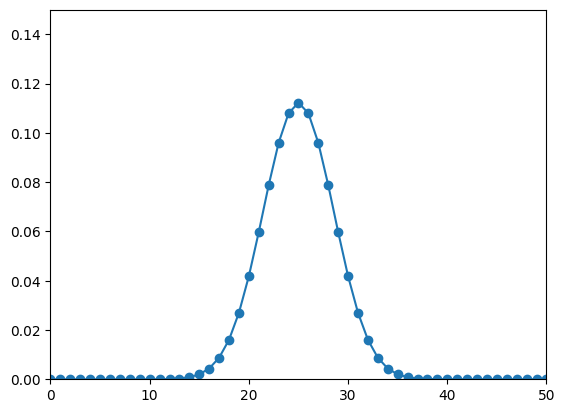

In [1]:
# import packages with the functions we need
import scipy.special
import matplotlib.pyplot as plt

probabilities = []

for n in range(51):
    # calculate probability of n heads
    probability = scipy.special.binom(50, n) / (2 ** 50)

    # convert to a string with 6 decimal places
    probString = "{:.6f}".format(probability)

    # print probability
    print('Probability of ' + str(n) + ' heads: ' + probString)

    # add probability to list
    probabilities.append(probability)

# plot the probabilites
plt.plot(range(51), probabilities, '-o')
plt.axis([0, 50, 0, 0.15])
plt.show()

Total number of socks: 60
Number of black socks: 20
Probability of choosing a black sock: 0.33


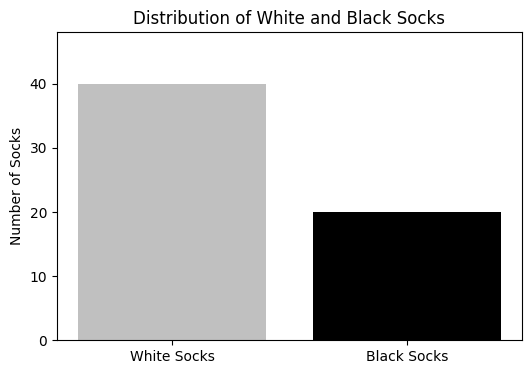

In [4]:
import matplotlib.pyplot as plt

num_white_pairs = 20
num_black_pairs = 10

total_socks = (num_white_pairs + num_black_pairs) * 2
num_black_socks = num_black_pairs * 2
num_white_socks = num_white_pairs * 2

probability_black_sock = num_black_socks / total_socks

print(f"Total number of socks: {total_socks}")
print(f"Number of black socks: {num_black_socks}")
print(f"Probability of choosing a black sock: {probability_black_sock:.2f}")

# --- Code to display diagram ---
sock_counts = [num_white_socks, num_black_socks]
sock_labels = ['White Socks', 'Black Socks']

plt.figure(figsize=(6, 4))
plt.bar(sock_labels, sock_counts, color=['silver', 'black'])
plt.ylabel('Number of Socks')
plt.title('Distribution of White and Black Socks')
plt.ylim(0, max(sock_counts) * 1.2)
plt.show()

Enter the number of white socks you want to select: 12

Collection: 40 white socks and 20 black socks
Probability of selecting 12 white sock(s): 0.003992
This is approximately 0.3992%

Generating probability diagram...


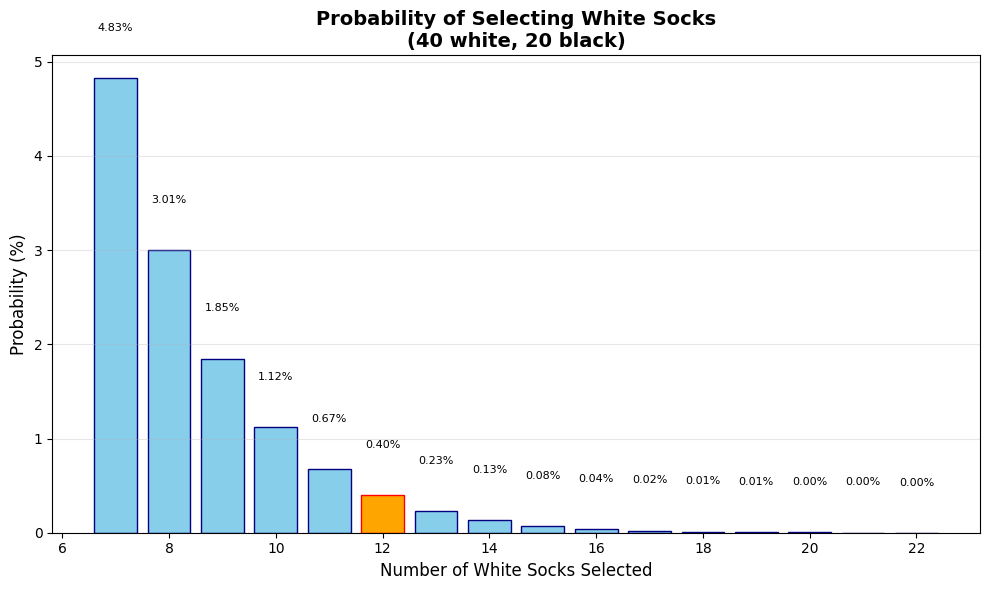

In [9]:
import math
import matplotlib.pyplot as plt

def combination(n, k):
    """Calculate the number of ways to choose k items from n items"""
    return math.comb(n, k)

def calculate_probability(n, white_socks, total_socks):
    """Calculate probability of selecting n white socks"""
    numerator = combination(white_socks, n)
    denominator = combination(total_socks, n)
    return numerator / denominator

def display_diagram(selected_n, probability, white_socks):
    """Display a bar chart showing probabilities"""
    # Calculate probabilities for a range of selections
    max_range = min(selected_n + 10, white_socks)
    min_range = max(0, selected_n - 5)

    numbers = list(range(min_range, max_range + 1))
    probabilities = []

    for n in numbers:
        prob = calculate_probability(n, white_socks, 60)
        probabilities.append(prob * 100)  # Convert to percentage

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(numbers, probabilities, color='skyblue', edgecolor='navy')

    # Highlight the selected number
    if selected_n in numbers:
        idx = numbers.index(selected_n)
        bars[idx].set_color('orange')
        bars[idx].set_edgecolor('red')

    plt.xlabel('Number of White Socks Selected', fontsize=12)
    plt.ylabel('Probability (%)', fontsize=12)
    plt.title('Probability of Selecting White Socks\n(40 white, 20 black)', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, (num, prob) in enumerate(zip(numbers, probabilities)):
        plt.text(num, prob + 0.5, f'{prob:.2f}%', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

def main():
    # Define the sock collection
    white_pairs = 20
    black_pairs = 10
    white_socks = white_pairs * 2  # 40 white socks
    black_socks = black_pairs * 2  # 20 black socks
    total_socks = white_socks + black_socks  # 60 total socks

    # Prompt user for input
    try:
        n = int(input("Enter the number of white socks you want to select: "))
    except ValueError:
        print("Error: Please enter a valid number.")
        return

    # Validate input
    if n < 0 or n > white_socks:
        print(f"Error: Number must be between 0 and {white_socks}.")
        return

    if n > total_socks:
        print(f"Error: Cannot select more than {total_socks} socks total.")
        return

    # Calculate probability
    probability = calculate_probability(n, white_socks, total_socks)

    # Display results
    print(f"\nCollection: {white_socks} white socks and {black_socks} black socks")
    print(f"Probability of selecting {n} white sock(s): {probability:.6f}")
    print(f"This is approximately {probability * 100:.4f}%")

    # Display diagram
    print("\nGenerating probability diagram...")
    display_diagram(n, probability, white_socks)

if __name__ == "__main__":
    main()
